In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('agriculture.csv')

In [3]:
data.shape

(2200, 8)

In [4]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [29]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
data['label'].value_counts()

mango          100
chickpea       100
cotton         100
maize          100
pomegranate    100
papaya         100
watermelon     100
mungbean       100
coconut        100
coffee         100
pigeonpeas     100
lentil         100
grapes         100
apple          100
blackgram      100
orange         100
banana         100
mothbeans      100
kidneybeans    100
muskmelon      100
rice           100
jute           100
Name: label, dtype: int64

In [7]:
print('average ratio of Nitrogen in the soil : {0:.2f}'.format(data['N'].mean()))
print('average ratio of Phosphorus in the soil : {0:.2f}'.format(data['P'].mean()))
print('average ratio of Potassium in the soil : {0:.2f}'.format(data['K'].mean()))
print('average of Temperaure in Celsius : {0:.2f}'.format(data['temperature'].mean()))
print('average ralative humidity in % : {0:.2f}'.format(data['humidity'].mean()))
print('average PH value of Soil : {0:.2f}'.format(data['ph'].mean()))
print('average rainfall in mm : {0:.2f}'.format(data['rainfall'].mean()))

average ratio of Nitrogen in the soil : 50.55
average ratio of Phosphorus in the soil : 53.36
average ratio of Potassium in the soil : 48.15
average of Temperaure in Celsius : 25.62
average ralative humidity in % : 71.48
average PH value of Soil : 6.47
average rainfall in mm : 103.46


In [8]:
# lets check the summary statictics for each of crops
@interact
def summary(crops = list(data['label'].value_counts().index)):
    x = data[data['label']==crops]
    print('**************************************************')
    print('Statictics Of Nitrogen')
    print('minimum nitrogen required:',x['N'].min())
    print('average nitrogen required:',x['N'].mean())
    print('maximum nitrogen required:',x['N'].max())
    print('**************************************************')
    print('Statictics Of Phosphorus')
    print('minimum Phosphorus required:',x['P'].min())
    print('average Phosphorus required:',x['P'].mean())
    print('maximum Phosphorus required:',x['P'].max())
    print('**************************************************')
    print('Statictics Of Potassium')
    print('minimum Potassium required:',x['K'].min())
    print('average Potassium required:',x['K'].mean())
    print('maximum Potassium required:',x['K'].max())
    print('**************************************************')
    print('Statictics Of Temperatue')
    print('minimum Temperature required:',x['temperature'].min())
    print('average Temperature required:',x['temperature'].mean())
    print('maximum Temperature required:',x['temperature'].max())
    print('**************************************************')
    print('Statictics Of humidity')
    print('minimum humidity required:',x['humidity'].min())
    print('average humidity required:',x['humidity'].mean())
    print('maximum humidity required:',x['humidity'].max())
    print('**************************************************')
    print('Statictics Of ph')
    print('minimum ph required:',x['ph'].min())
    print('average ph required:',x['ph'].mean())
    print('maximum ph required:',x['ph'].max())
    print('**************************************************')
    print('Statictics Of rainfall')
    print('minimum rainfall required:',x['rainfall'].min())
    print('average rainfall required:',x['rainfall'].mean())
    print('maximum rainfall required:',x['rainfall'].max())
    print('**************************************************')

interactive(children=(Dropdown(description='crops', options=('mango', 'chickpea', 'cotton', 'maize', 'pomegran…

In [9]:
# lets compare the average requirement for each crops with avarage conditions
@interact
def cpmpare(conditions = ['N','P','K','temperature','humidity','ph','rainfall']):
    print('avarage value of', conditions, 'is {0:.2f}'.format(data[conditions].mean()))
    print('Banana : {0:.2f}'.format(data[data['label']=='banana'][conditions].mean()))
    print('Rice : {0:.2f}'.format(data[data['label']=='rice'][conditions].mean()))
    print('Jute : {0:.2f}'.format(data[data['label']=='jute'][conditions].mean()))
    print('Lentil : {0:.2f}'.format(data[data['label']=='lentil'][conditions].mean()))
    print('Pigeonpeas : {0:.2f}'.format(data[data['label']=='pigeonpeas'][conditions].mean()))
    print('Kidneybeans : {0:.2f}'.format(data[data['label']=='kidneybeans'][conditions].mean()))
    print('Watermelon " {0:.2f}'.format(data[data['label']=='watermelon'][conditions].mean()))
    print('Orange : {0:.2f}'.format(data[data['label']=='orange'][conditions].mean()))
    print('Mango : {0:.2f}'.format(data[data['label']=='mango'][conditions].mean())) 
    print('Coffee : {0:.2f}'.format(data[data['label']=='coffee'][conditions].mean()))
    print('Blackgram : {}0:.2f'.format(data[data['label']=='blackgram'][conditions].mean()))
    print('Apple : {0:.2f}'.format(data[data['label']=='apple'][conditions].mean()))
    print('Maize : {0:.2f}'.format(data[data['label']=='maize'][conditions].mean()))
    print('Muskmelon : {0:.2f}'.format(data[data['label']=='muskmelon'][conditions].mean()))
    print('Chipckpea : {0:.2f}'.format(data[data['label']=='chipckpea'][conditions].mean()))
    print('Grapes : {0:.2f}'.format(data[data['label']=='grapes'][conditions].mean())) 
    print('Coconut : {0:.2f}'.format(data[data['label']=='coconut'][conditions].mean()))      
    print('Mungbean : {0:.2f}'.format(data[data['label']=='mungbean'][conditions].mean())) 
    print('Pomegranate : {0:.2f}'.format(data[data['label']=='pomegranate'][conditions].mean()))
    print('Cotton : {0:.2f}'.format(data[data['label']=='cotton'][conditions].mean()))
    print('Mothbeans :{0:.2f}'.format(data[data['label']=='motebeans'][conditions].mean()))
    print('Papaya : {0:.2f}'.format(data[data['label']=='papaya'][conditions].mean()))      
    

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

In [10]:
# lets make this functions more intiutive diplay the crops required for below and above average climat condtions
@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print('Crops with requirement is greater than average****',conditions)
    print(data[data[conditions] > data[conditions].mean()]['label'].unique())
    print('***************************************************************')
    print('***************************************************************')
    print('Crops with requirement is less than average*******',conditions)
    print(data[data[conditions] < data[conditions].mean()]['label'].unique())
    

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

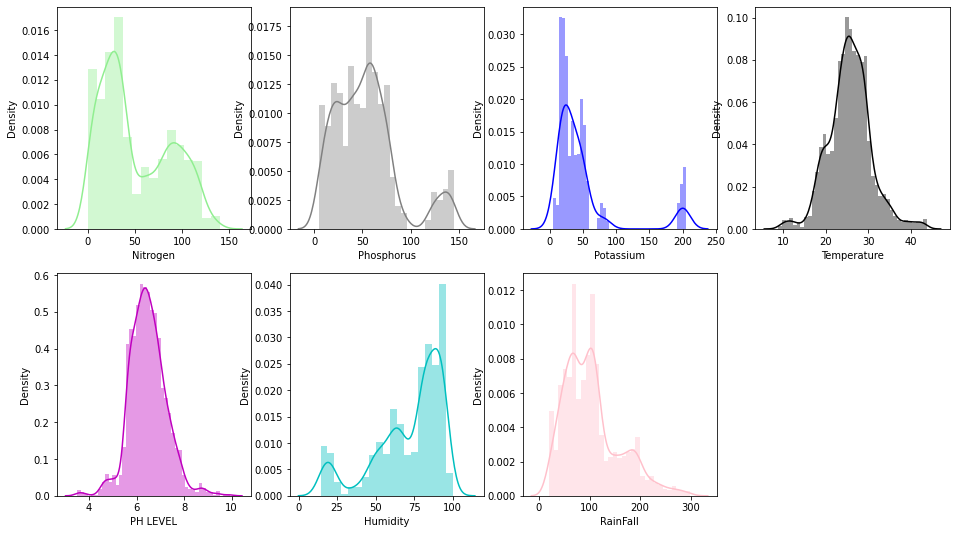

In [11]:
plt.figure(figsize=(16,9))
plt.subplot(2,4,1)
sns.distplot(data['N'],color='lightgreen')
plt.xlabel('Nitrogen')

plt.subplot(2,4,2)
sns.distplot(data['P'],color="gray")
plt.xlabel('Phosphorus')

plt.subplot(2,4,3)
sns.distplot(data['K'],color="blue")
plt.xlabel('Potassium')

plt.subplot(2,4,4)
sns.distplot(data['temperature'],color="k")
plt.xlabel('Temperature')

plt.subplot(2,4,5)
sns.distplot(data['ph'],color='m')
plt.xlabel('PH LEVEL')

plt.subplot(2,4,6)
sns.distplot(data['humidity'],color='c')
plt.xlabel('Humidity')

plt.subplot(2,4,7)
sns.distplot(data['rainfall'],color='pink')
plt.xlabel('RainFall')
plt.show()

In [12]:
# lets find the high temperature and low temperature content 
print('*********************************************************')
print('High Nitrogen in soil *****',data[data['N'] > 120]['label'].unique())
print('High Phosphorus in soil ***',data[data['P'] > 100]['label'].unique())
print('High Potassium in soil ****',data[data['K'] > 200]['label'].unique())
print('High Rainfall *************',data[data['rainfall'] > 200]['label'].unique())
print('High Temperature **********',data[data['temperature'] > 40]['label'].unique())
print('High Humidity *************',data[data['humidity'] > 20]['label'].unique())
print('High PH *******************',data[data['ph'] > 9]['label'].unique())

*********************************************************
High Nitrogen in soil ***** ['cotton']
High Phosphorus in soil *** ['grapes' 'apple']
High Potassium in soil **** ['grapes' 'apple']
High Rainfall ************* ['rice' 'papaya' 'coconut']
High Temperature ********** ['grapes' 'papaya']
High Humidity ************* ['rice' 'maize' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes' 'watermelon'
 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton' 'jute' 'coffee']
High PH ******************* ['mothbeans']


In [13]:
# lets find which crops can only be grown in summer season, winter season and rainy season
print('Summer Crops')
print(data[(data['temperature'] > 30) & (data['humidity'] > 50 )]['label'].unique())
print('************************************************************************')
print('Winter Crops')
print(data[(data['temperature'] < 29) & (data['humidity'] > 30)]['label'].unique())
print('************************************************************************')
print('Rainy Crops')
print(data[(data['rainfall'] > 200) & (data['humidity'] >30)]['label'].unique())


Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
************************************************************************
Winter Crops
['rice' 'maize' 'pigeonpeas' 'mothbeans' 'mungbean' 'blackgram' 'lentil'
 'pomegranate' 'banana' 'mango' 'grapes' 'watermelon' 'muskmelon' 'apple'
 'orange' 'papaya' 'coconut' 'cotton' 'jute' 'coffee']
************************************************************************
Rainy Crops
['rice' 'papaya' 'coconut']


In [14]:
from sklearn.cluster import KMeans

# removing the label column
x = data.drop(['label'],axis=1)

# selecting all values from data
x = x.values

# checking the shape
print(x.shape)

(2200, 7)


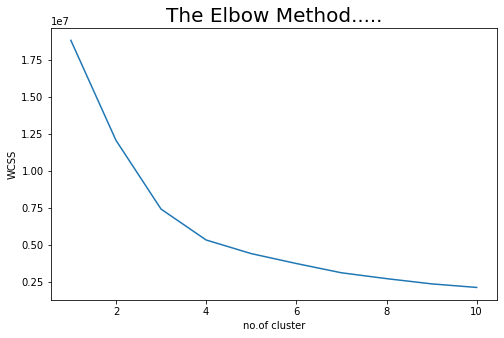

In [15]:
# lets determine the optimum number of cluster within the dataset
plt.figure(figsize=(8,5))
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters = i,init = 'k-means++',max_iter=300,n_init=10,random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
# lets the plot the result
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method.....',fontsize=20)
plt.xlabel('no.of cluster')
plt.ylabel('WCSS')
plt.show()

In [16]:
# lets important the kmeans algorithm to perform clustering analysis
km = KMeans(n_clusters = 4,init = 'k-means++',max_iter=300,n_init=10,random_state=0)
y_means = km.fit_predict(x)

# lets find out result
a = data['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means,a],axis=1)
z = z.rename(columns={0:'cluster'})

# lets check the cluster of each crops
print('lets the check the result appying the k-means clustering analysis \n')
print('Crops in the First Cluster',z[z['cluster']==0]['label'].unique())
print('_________________________________________________________________')
print('Crops in the Second Cluster',z[z['cluster']==1]['label'].unique())
print('________________________________________________________________')
print('Crops in the Third Cluster',z[z['cluster']==2]['label'].unique())
print('________________________________________________________________')
print('Crops in the Forth Cluster',z[z['cluster']==3]['label'].unique())
print('________________________________________________________________')

lets the check the result appying the k-means clustering analysis 

Crops in the First Cluster ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
_________________________________________________________________
Crops in the Second Cluster ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
________________________________________________________________
Crops in the Third Cluster ['grapes' 'apple']
________________________________________________________________
Crops in the Forth Cluster ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']
________________________________________________________________


In [17]:
y = data['label']
x = data.drop(['label'],axis=1)


In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=0)


In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)


In [21]:
from sklearn.metrics import confusion_matrix

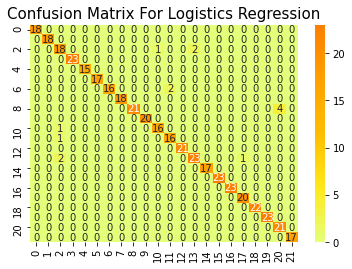

In [22]:
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True,cmap='Wistia')
plt.title('Confusion Matrix For Logistics Regression',fontsize=15)
plt.show()

In [23]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [24]:
#  lets cross check the predicted value
result = model.predict((np.array([[90,40,40,20,80,7,200]])))
print('the suggest crop for given climate condition is :',result)

the suggest crop for given climate condition is : ['rice']


In [25]:
import joblib

In [26]:
joblib.dump(model,'agricultural production optimization engine.pkl')

['agricultural production optimization engine.pkl']

In [27]:
model = joblib.load('agricultural production optimization engine.pkl')

In [28]:
model.predict((np.array([[90,40,40,20,80,7,200]])))

array(['rice'], dtype=object)